In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Processing Data

## 1. Dealing with the data

In [5]:
df.info()
print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.select_dtypes(include=np.object).nunique()

Customer             9134
State                   5
Response                2
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Renew Offer Type        4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

In [7]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
def stand(x):
    first_column = x.pop('Effective To Date')
    x.insert(0,'Effective To Date', first_column)
    last_column = x.pop('Total Claim Amount')
    x.insert(23, 'Total Claim Amount', last_column)
    x.rename(columns = {'Customer Lifetime Value' : 'clv', 'EmploymentStatus' : 'Es', 'Total Claim Amount' : 'tca'}, inplace = True)
    x.columns = x.columns.str.lower()
    return x

stand(df)

,effective to date,customer,state,clv,response,coverage,education,es,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,tca
0,2/24/11,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,1/31/11,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,2/19/11,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,1/20/11,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2/3/11,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2/10/11,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,198.234764
9130,2/12/11,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
9131,2/6/11,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
9132,2/3/11,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,691.200000


## 2. Explore the data

<AxesSubplot:>

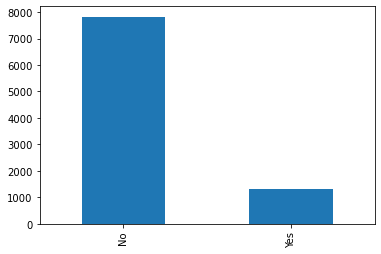

In [9]:
df['response'].value_counts().plot(kind='bar')

<AxesSubplot:>

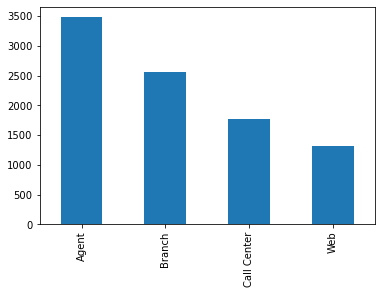

In [10]:
df['sales channel'].value_counts().plot(kind='bar')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clv,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
tca,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


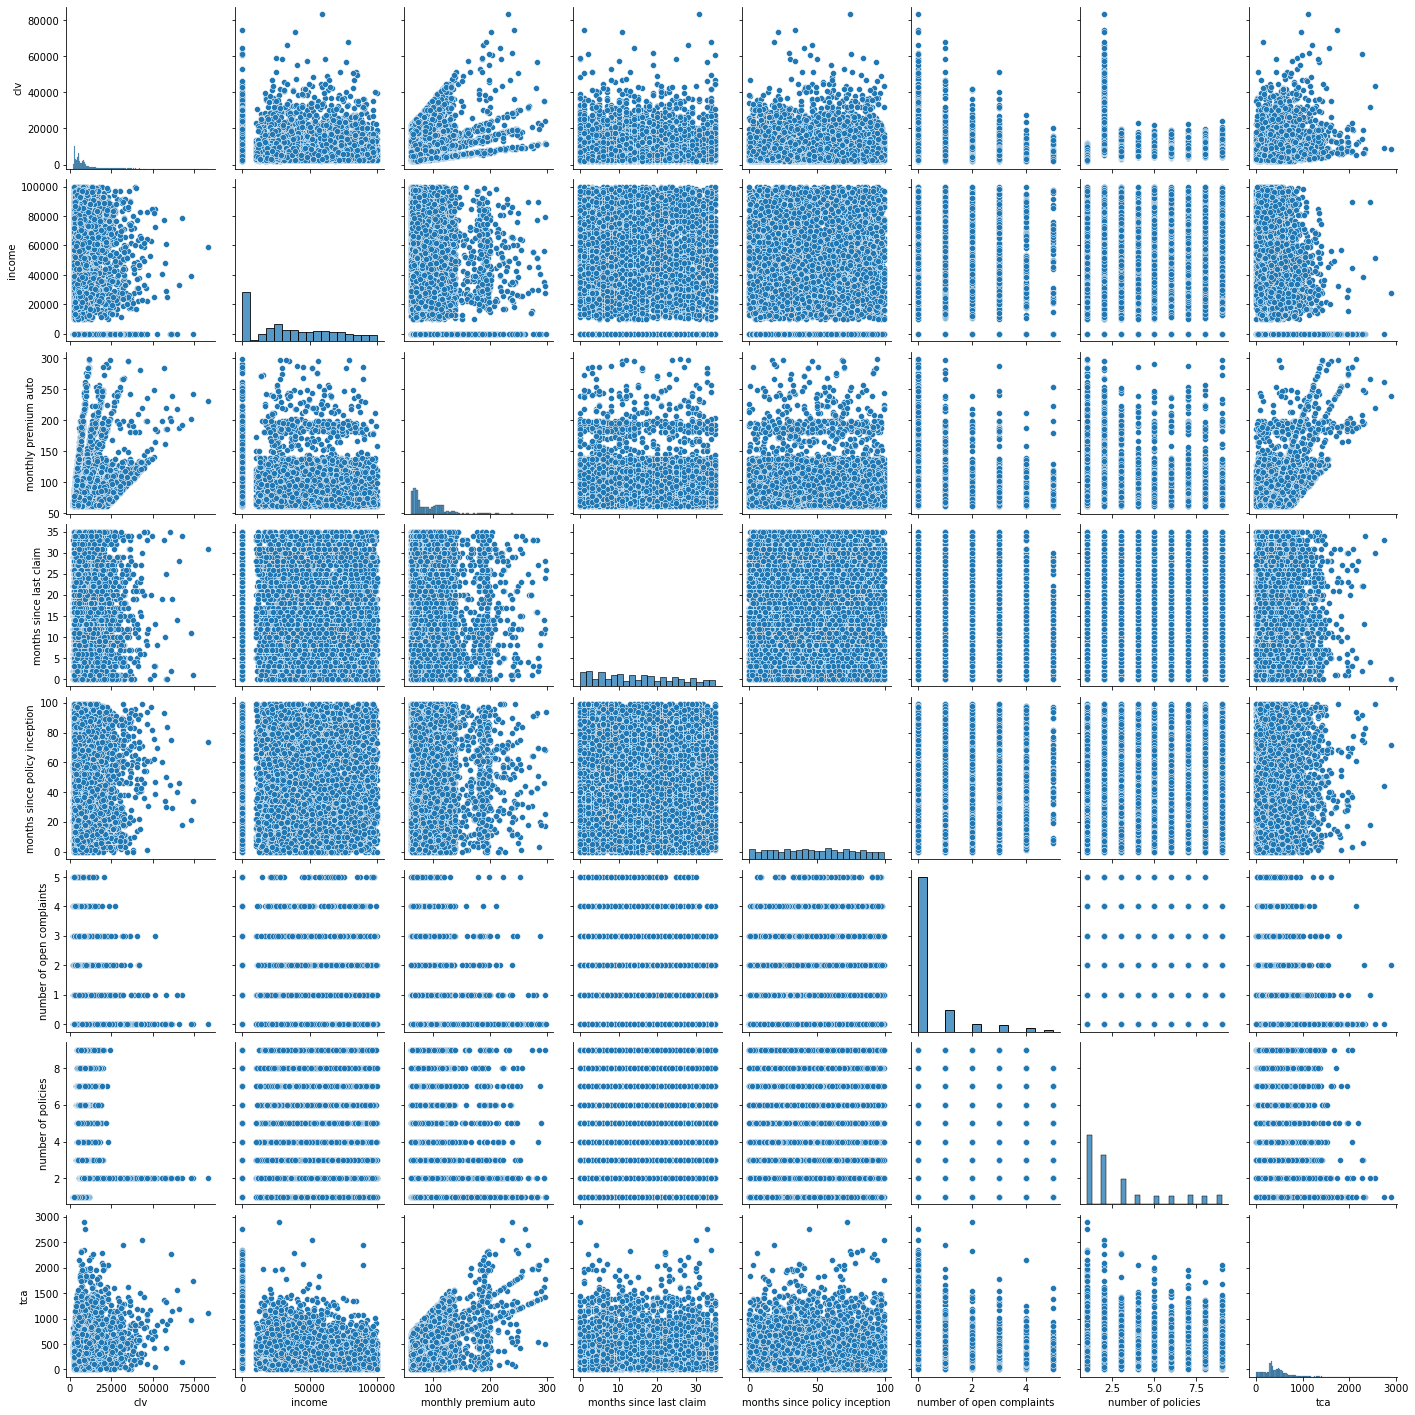

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='clv', ylabel='Density'>

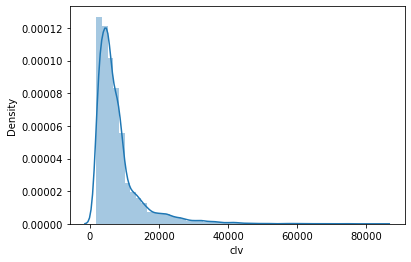

In [13]:
sns.distplot(df.clv)

<AxesSubplot:xlabel='income', ylabel='Density'>

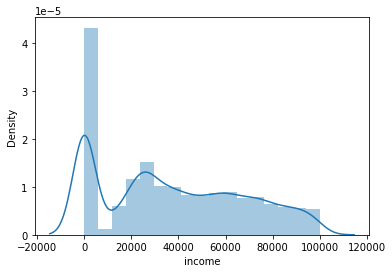

In [14]:
sns.distplot(df.income)

<AxesSubplot:xlabel='tca', ylabel='Density'>

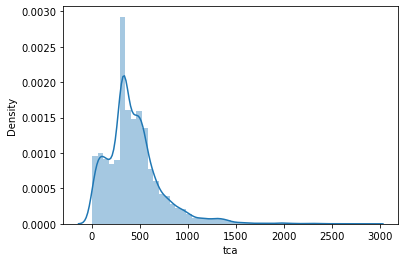

In [15]:
sns.distplot(df.tca)

In [16]:
df.corr()

,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,tca
clv,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
tca,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

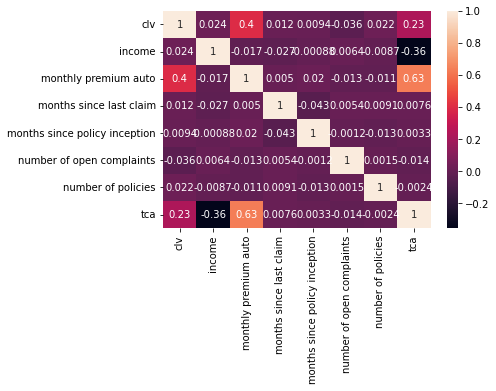

In [17]:
annot = True
sns.heatmap(df.corr(), annot=annot)

## 3. Processing Data

In [18]:
df

,effective to date,customer,state,clv,response,coverage,education,es,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,tca
0,2/24/11,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
1,1/31/11,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
2,2/19/11,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
3,1/20/11,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
4,2/3/11,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2/10/11,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,198.234764
9130,2/12/11,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,379.200000
9131,2/6/11,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,790.784983
9132,2/3/11,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,691.200000


In [19]:
#Splitting X and y

In [20]:
#X are the explanatory features: I am not considering the "Customer" and "Effective to Date" features due to the amount of unique values. Also the "Customer" feature doesn't appear to be important to the linear regression.   
#y is the target vector -> "total claim anmount" (tca), as it was mentioned in the last lab that it would be used as target later
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

In [21]:
X

,state,clv,response,coverage,education,es,gender,income,location code,marital status,...,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [22]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: tca, Length: 9134, dtype: float64

In [23]:
y.head(10)

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
5     159.383042
6     321.600000
7     363.029680
8     511.200000
9     425.527834
Name: tca, dtype: float64

In [24]:
#Normalize (numerical) of X
#One hot encoding using pd dummies
X = pd.get_dummies(X, drop_first=True)
display(X)
print("Original df shape:",df.shape)
print("X Shape:",X.shape)

,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,2763.519279,56274,69,32,5,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,3096.511217,21604,79,14,28,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,8163.890428,0,85,9,37,3,2,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,7524.442436,21941,96,34,3,0,3,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Original df shape: (9134, 24)
X Shape: (9134, 50)


# Linear Regression

## 1. Train-test split

In [29]:
# division of the dataset into trains and a test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
X_train

,clv,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
8607,5389.499465,66429,136,35,93,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2121,12786.668980,0,180,14,70,0,4,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5361,7834.151482,36094,99,28,50,1,5,1,0,0,...,1,0,0,0,0,0,0,1,1,0
7003,8223.164916,95102,101,6,73,0,8,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7416,9031.214859,0,122,15,47,0,9,1,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7334.328083,87957,61,31,63,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5191,5498.940679,22520,73,17,64,0,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5390,8992.779137,0,129,13,4,0,7,1,0,0,...,0,1,0,0,0,1,0,0,1,0
860,14635.451580,0,139,5,56,0,2,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

In [32]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 2. Apply Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() 

In [36]:
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
#coeficients of the regressor
reg.coef_

array([ 1.41234009e+00, -7.98136177e+00,  1.67396646e+02,  2.20588164e+00,
       -7.56033786e-01, -9.56355004e-01,  5.72209762e-01,  2.83590654e-01,
        2.03021943e+00, -1.51741524e+00,  3.40800816e-02, -8.46879975e+00,
       -4.62175745e+00, -1.48407856e-01, -3.61582960e+00, -3.94755484e+00,
        3.18423043e+00, -2.96320958e+00, -2.96383534e+00,  3.79633379e+00,
       -1.03120955e+00,  3.02359354e+01,  6.41500990e+00,  1.82782987e+02,
        8.31242471e+01, -3.19379132e+00,  2.81761775e+01,  2.15926064e+14,
       -4.51235141e+13, -1.53996764e+00, -2.53642595e+00, -1.70745321e+14,
       -2.09356455e+14, -2.39918726e+14,  1.92329194e+13,  2.99459955e+13,
        2.87445374e+13,  7.90395420e+00,  2.99955075e+00,  1.51304690e+00,
       -1.77977717e+00, -3.06329432e+00,  4.70357188e-01,  1.23428827e+01,
        4.78768158e+00,  1.91644465e-01, -2.99646293e+00,  1.63038021e+00,
       -4.99155888e+00, -3.35849337e+00])

In [38]:
predictions_train = reg.predict(X_train)

In [42]:
predictions_train.size

6850

In [44]:
X_train.shape

(6850, 50)

# Model Validation

## 1. MSE (measure squared error)

In [45]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, predictions_train)

19311.881110734357

In [46]:
predictions_test = reg.predict(X_test)

In [48]:
mean_squared_error(y_test, predictions_test)

19052.095680966675

## 2. R2 (r squared)

In [51]:
from sklearn.metrics import r2_score

display(r2_score(y_train, predictions_train))
r2_score(y_test, predictions_test)

0.7742058098215406

0.7644690567350992

## 3. MAE (mean absolute error)

In [54]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions_test)

94.38387445029818